# In-class exercise: turbulence simulations analysis


1. Choose file # 10 and normalise quantities to CGS units.


2. Make a plot of density with superimposed velocity vectors.


3. Make a plot of thermal pressure with superimposed magnetic field vectors.


Remember that the thermal pressure for isothermal gas is:

$p = \rho\,c_{\rm iso}^2$, where $c_{\rm iso}$ is the isothermal sound speed (see **units.out**).

To normalise the magnetic field, we can use the following normalisation factor:

$B_0 = v_0\,\sqrt{4\,\pi\,\rho_0}$


4. The times can be retrieved from the second column of the **vtk.out** file in code units. To normalise it to CGS units, we can first calculate the normalisation factor for time:

$t_0 = \frac{L_0}{v_0}$


5. Make a histogram of the density field and fit an appropriate function using regression methods.


6. Create a function that calculates the following quantities and prints them in a pandas row with time in the first column and headers:


 - density average 
 
 - density standard deviation
 
 - thermal pressure average
 
 - thermal pressure standard deviation

### Import libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv

In [2]:
import pandas as pd
from scipy.optimize import curve_fit

### Read mesh:

In [3]:
mesh = pv.read("./TURB_DRIVE_SUP/data.0010.vtk")

In [4]:
print(mesh)

RectilinearGrid (0x12729e210)
  N Cells:	2500
  N Points:	2601
  X Bounds:	-2.000e+00, 2.000e+00
  Y Bounds:	-2.000e+00, 2.000e+00
  Z Bounds:	0.000e+00, 0.000e+00
  Dimensions:	51, 51, 1
  N Arrays:	5



### Get data arrays in code units:

In [5]:
rho = pv.get_array(mesh, "rho", preference = 'cell')
vx1 = pv.get_array(mesh, "vx1", preference = 'cell')
vx2 = pv.get_array(mesh, "vx2", preference = 'cell')
Bx1 = pv.get_array(mesh, "Bx1", preference = 'cell')
Bx2 = pv.get_array(mesh, "Bx2", preference = 'cell')

In [6]:
print(rho.shape)

(2500,)


### Normalisation:

Remember that we need to read the **units.out** file and multiply the arrays above by the normalisation constants:

In [7]:
data = pd.read_csv("./TURB_DRIVE_SUP/units.out")

In [8]:
print(data)

  variable  normalisation   units
0    rho_0   1.660000e-24  g/cm^3
1      v_0   1.000000e+06    cm/s
2      L_0   3.086000e+18      cm
3    c_iso   1.000000e+06    cm/s


In [9]:
rho_0   = np.array(data.loc[data["variable"] == "rho_0"]["normalisation"])
vel_0   = np.array(data.loc[data["variable"] == "v_0"]["normalisation"])
len_0   = np.array(data.loc[data["variable"] == "L_0"]["normalisation"])
c_iso   = np.array(data.loc[data["variable"] == "c_iso"]["normalisation"])

### New normalisations:

In [10]:
tim_0 = (len_0/vel_0)

print(tim_0) # in seconds

[3.086e+12]


Magnetic field:
$B_0 = v_0\,\sqrt{4\,\pi\,\rho_0}$

In [11]:
bfi_0 = vel_0*np.sqrt(4*np.pi*rho_0)

print(bfi_0) # in Gauss

[4.56729408e-06]


### Normalise:

In [12]:
rho_cgs = rho*rho_0

vx1_cgs = vx1*vel_0
vx2_cgs = vx2*vel_0

Bx1_cgs = Bx1*bfi_0
Bx2_cgs = Bx2*bfi_0

In [13]:
print(Bx1_cgs.shape)

(2500,)


### Convert to 2D:

In [14]:
rho_cgs2D = rho_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)

vx1_cgs2D = vx1_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
vx2_cgs2D = vx2_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)

Bx1_cgs2D = Bx1_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
Bx2_cgs2D = Bx2_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)

In [15]:
print(rho_cgs2D.shape)

(50, 50)


### Read time data:

In [16]:
time_data = pd.read_csv("./TURB_DRIVE_SUP/vtk.out", sep ='\s+', header = None)

In [17]:
print(time_data)

      0         1         2    3            4       5    6    7    8    9   \
0      0  0.000000  0.000100    0  single_file  little  rho  vx1  vx2  Bx1   
1      1  0.018194  0.001919   31  single_file  little  rho  vx1  vx2  Bx1   
2      2  0.036404  0.003740   38  single_file  little  rho  vx1  vx2  Bx1   
3      3  0.059240  0.006024   43  single_file  little  rho  vx1  vx2  Bx1   
4      4  0.079180  0.008018   46  single_file  little  rho  vx1  vx2  Bx1   
..   ...       ...       ...  ...          ...     ...  ...  ...  ...  ...   
96    96  1.918657  0.001664  809  single_file  little  rho  vx1  vx2  Bx1   
97    97  1.938610  0.001678  821  single_file  little  rho  vx1  vx2  Bx1   
98    98  1.958715  0.001762  833  single_file  little  rho  vx1  vx2  Bx1   
99    99  1.979934  0.001973  844  single_file  little  rho  vx1  vx2  Bx1   
100  100  2.000000  0.000444  855  single_file  little  rho  vx1  vx2  Bx1   

      10  
0    Bx2  
1    Bx2  
2    Bx2  
3    Bx2  
4    Bx2

### Get second column:

In [18]:
time_code = time_data.iloc[:,1]

In [19]:
print(time_code)

0      0.000000
1      0.018194
2      0.036404
3      0.059240
4      0.079180
         ...   
96     1.918657
97     1.938610
98     1.958715
99     1.979934
100    2.000000
Name: 1, Length: 101, dtype: float64


In [20]:
time_cgs = time_code*tim_0

In [21]:
print(time_cgs)

0      0.000000e+00
1      5.614773e+10
2      1.123438e+11
3      1.828149e+11
4      2.443480e+11
           ...     
96     5.920976e+12
97     5.982550e+12
98     6.044594e+12
99     6.110076e+12
100    6.172000e+12
Name: 1, Length: 101, dtype: float64


## PLOTTING

## Density + Velocity map

In [22]:
x = np.linspace(mesh.bounds[0]*len_0, mesh.bounds[1]*len_0, mesh.dimensions[0] - 1)
y = np.linspace(mesh.bounds[2]*len_0, mesh.bounds[3]*len_0, mesh.dimensions[1] - 1)

In [23]:
X, Y = np.meshgrid(x, y)

### SPEED

In [24]:
modulus_velocity = np.sqrt(vx1_cgs2D**2 + vx2_cgs2D**2)

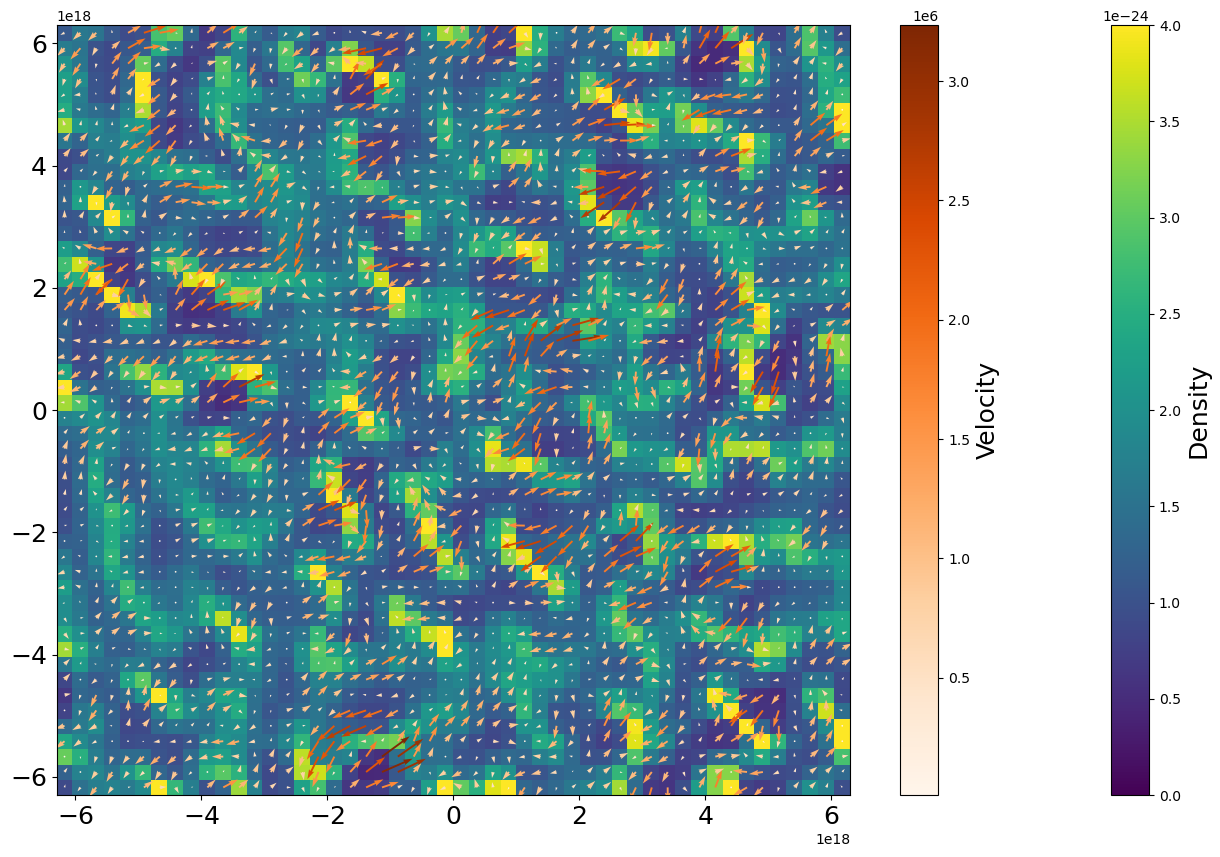

In [25]:
plt.figure(figsize = (16,10))

Z1 = plt.pcolor(X, Y, rho_cgs2D, cmap = 'viridis', shading = 'auto', vmin = 0, vmax= 4.e-24)
Z2 = plt.quiver(X, Y, vx1_cgs2D, vx2_cgs2D, modulus_velocity, cmap = 'Oranges')

CB1 = plt.colorbar(Z1)
CB2 = plt.colorbar(Z2)

CB1.set_label('Density', size=18)
CB2.set_label('Velocity', size=18)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

### Calculate thermal pressure:

$p = \rho\,c_{\rm iso}^2$, where $c_{\rm iso}$ is the isothermal sound speed (see **units.out**).

In [26]:
prs_cgs2D = rho_cgs2D*c_iso**2

### Calculate magnetic flux density:

In [27]:
modulus_bfield = np.sqrt(Bx1_cgs2D**2 + Bx2_cgs2D**2)

## Thermal presure + Magnetic field

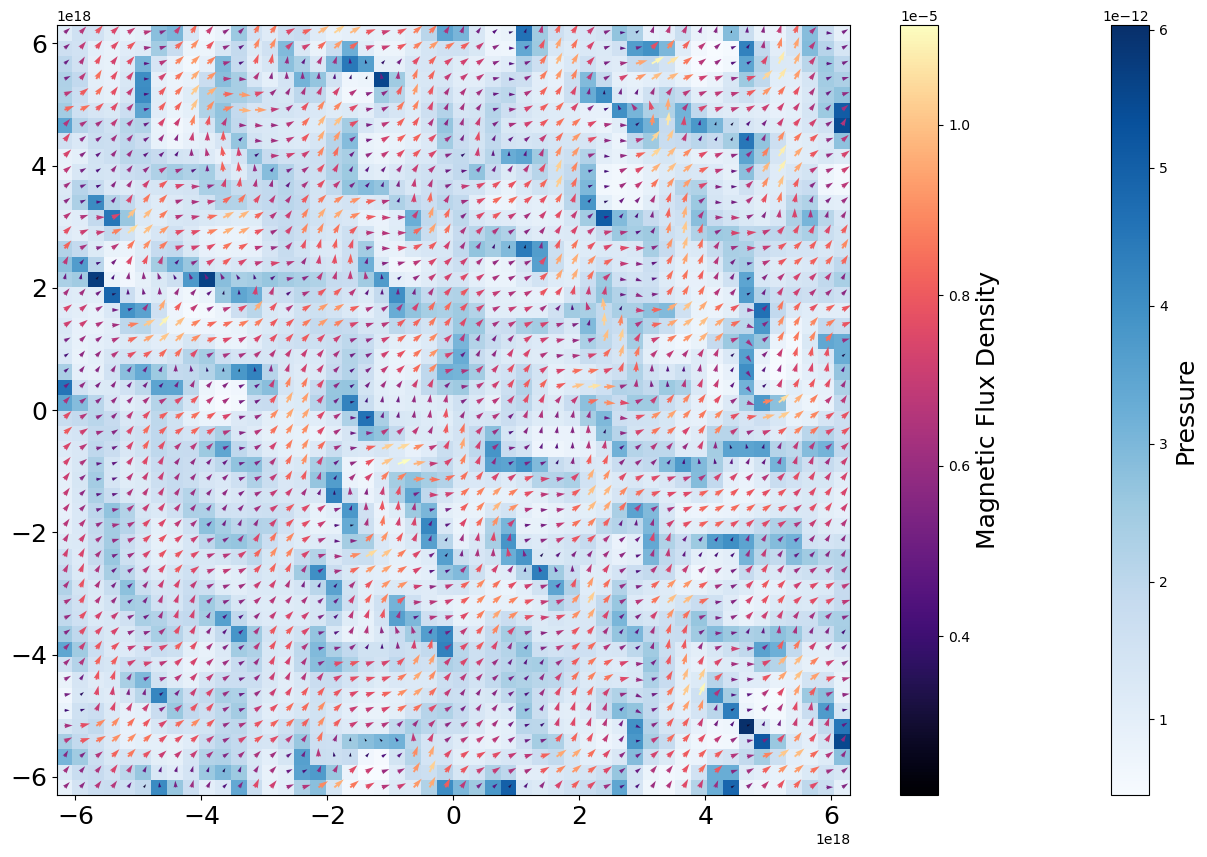

In [28]:
plt.figure(figsize = (16,10))

Z1 = plt.pcolor(X, Y, prs_cgs2D, cmap = 'Blues', shading = 'auto')#, vmin = 0, vmax= 4.e-24)
Z2 = plt.quiver(X, Y, Bx1_cgs2D, Bx2_cgs2D, modulus_bfield, cmap = 'magma')

CB1 = plt.colorbar(Z1)
CB2 = plt.colorbar(Z2)

CB1.set_label('Pressure', size=18)
CB2.set_label('Magnetic Flux Density', size=18)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

## Density Histograms

In [29]:
print(rho_cgs2D.shape)

(50, 50)


In [30]:
print(rho_cgs.shape)

(2500,)


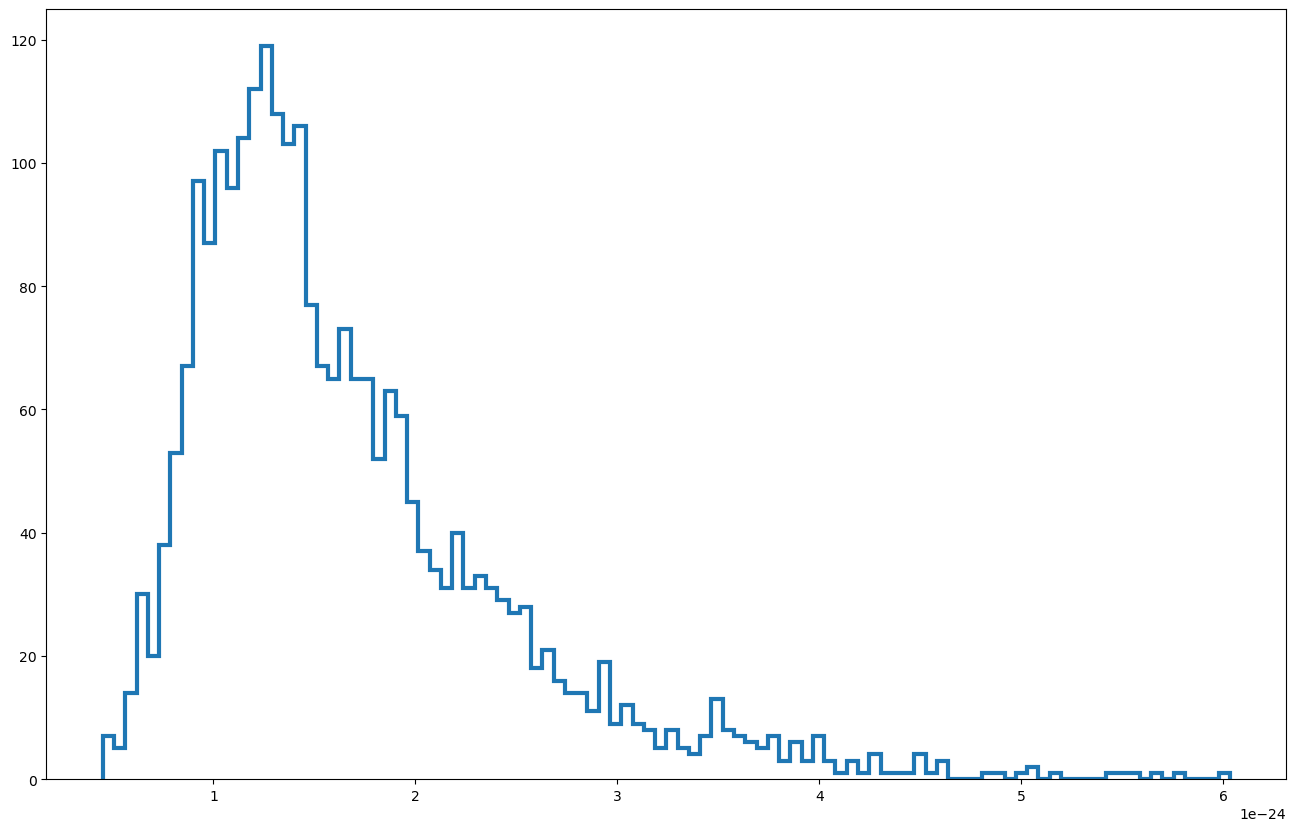

In [31]:
plt.figure(figsize = (16,10))
plt.hist(rho_cgs, 100, histtype = 'step', lw = 3.0)
plt.show()

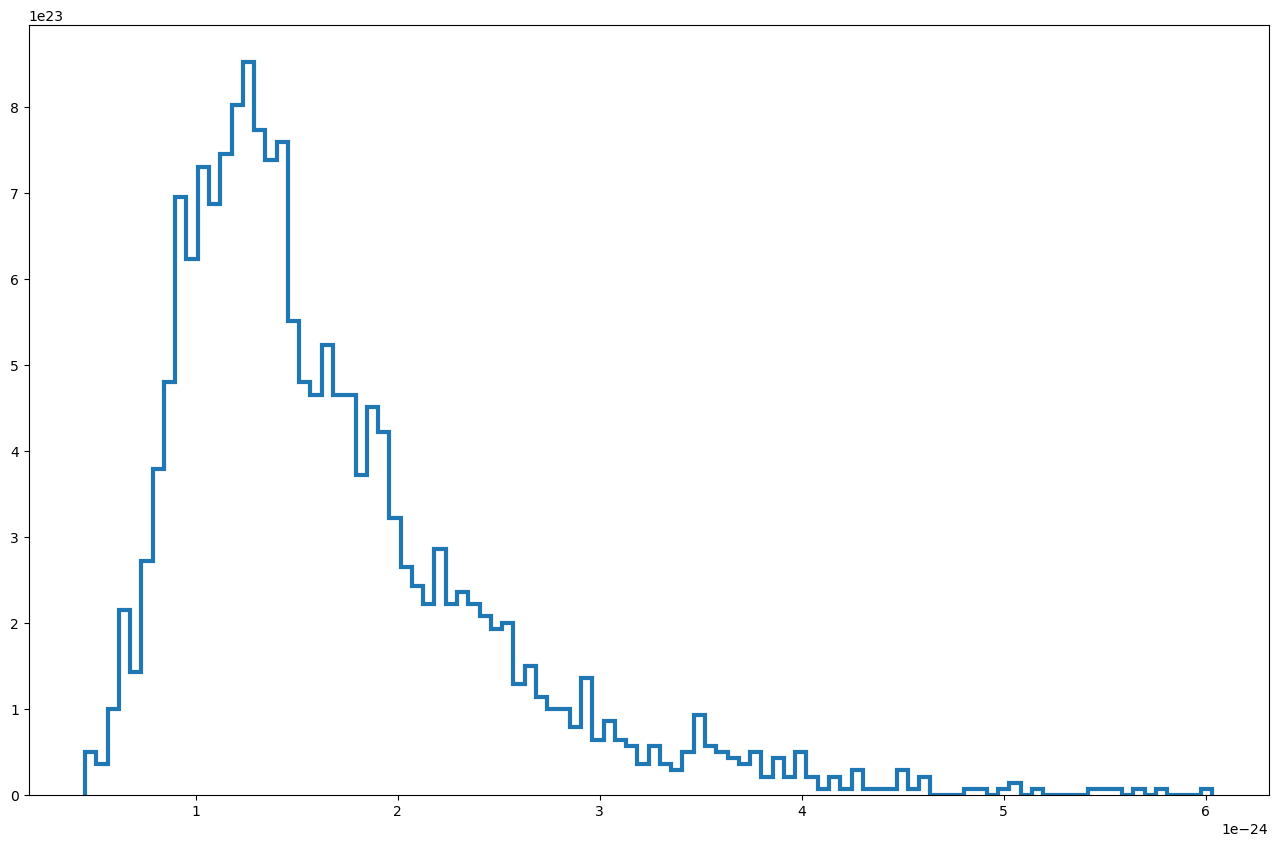

In [32]:
plt.figure(figsize = (16,10))
n, bins, patches = plt.hist(rho_cgs, 100, histtype = 'step', lw = 3.0, density = True)
plt.show()

In [33]:
print(n)

[5.01695117e+22 3.58353655e+22 1.00339023e+23 2.15012193e+23
 1.43341462e+23 2.72348778e+23 3.79854874e+23 4.80193898e+23
 6.95206091e+23 6.23535360e+23 7.31041456e+23 6.88039018e+23
 7.45375603e+23 8.02712187e+23 8.52881699e+23 7.74043895e+23
 7.38208530e+23 7.59709749e+23 5.51864629e+23 4.80193898e+23
 4.65859752e+23 5.23196336e+23 4.65859752e+23 4.65859752e+23
 3.72687801e+23 4.51525605e+23 4.22857313e+23 3.22518290e+23
 2.65181705e+23 2.43680485e+23 2.22179266e+23 2.86682924e+23
 2.22179266e+23 2.36513412e+23 2.22179266e+23 2.07845120e+23
 1.93510974e+23 2.00678047e+23 1.29007316e+23 1.50508535e+23
 1.14673170e+23 1.00339023e+23 1.00339023e+23 7.88378041e+22
 1.36174389e+23 6.45036579e+22 8.60048772e+22 6.45036579e+22
 5.73365848e+22 3.58353655e+22 5.73365848e+22 3.58353655e+22
 2.86682924e+22 5.01695117e+22 9.31719503e+22 5.73365848e+22
 5.01695117e+22 4.30024386e+22 3.58353655e+22 5.01695117e+22
 2.15012193e+22 4.30024386e+22 2.15012193e+22 5.01695117e+22
 2.15012193e+22 7.167073

In [34]:
print(n.shape)

(100,)


In [35]:
print(bins)

[4.51929998e-25 5.07740786e-25 5.63551575e-25 6.19362363e-25
 6.75173151e-25 7.30983940e-25 7.86794728e-25 8.42605516e-25
 8.98416305e-25 9.54227093e-25 1.01003788e-24 1.06584867e-24
 1.12165946e-24 1.17747025e-24 1.23328103e-24 1.28909182e-24
 1.34490261e-24 1.40071340e-24 1.45652419e-24 1.51233498e-24
 1.56814576e-24 1.62395655e-24 1.67976734e-24 1.73557813e-24
 1.79138892e-24 1.84719971e-24 1.90301049e-24 1.95882128e-24
 2.01463207e-24 2.07044286e-24 2.12625365e-24 2.18206444e-24
 2.23787523e-24 2.29368601e-24 2.34949680e-24 2.40530759e-24
 2.46111838e-24 2.51692917e-24 2.57273996e-24 2.62855074e-24
 2.68436153e-24 2.74017232e-24 2.79598311e-24 2.85179390e-24
 2.90760469e-24 2.96341547e-24 3.01922626e-24 3.07503705e-24
 3.13084784e-24 3.18665863e-24 3.24246942e-24 3.29828020e-24
 3.35409099e-24 3.40990178e-24 3.46571257e-24 3.52152336e-24
 3.57733415e-24 3.63314493e-24 3.68895572e-24 3.74476651e-24
 3.80057730e-24 3.85638809e-24 3.91219888e-24 3.96800966e-24
 4.02382045e-24 4.079631

In [36]:
print(bins.shape)

(101,)


In [37]:
x0 = 0.5 * ( bins[1:] + bins[:-1] ) 

In [38]:
print(x0.shape)

(100,)


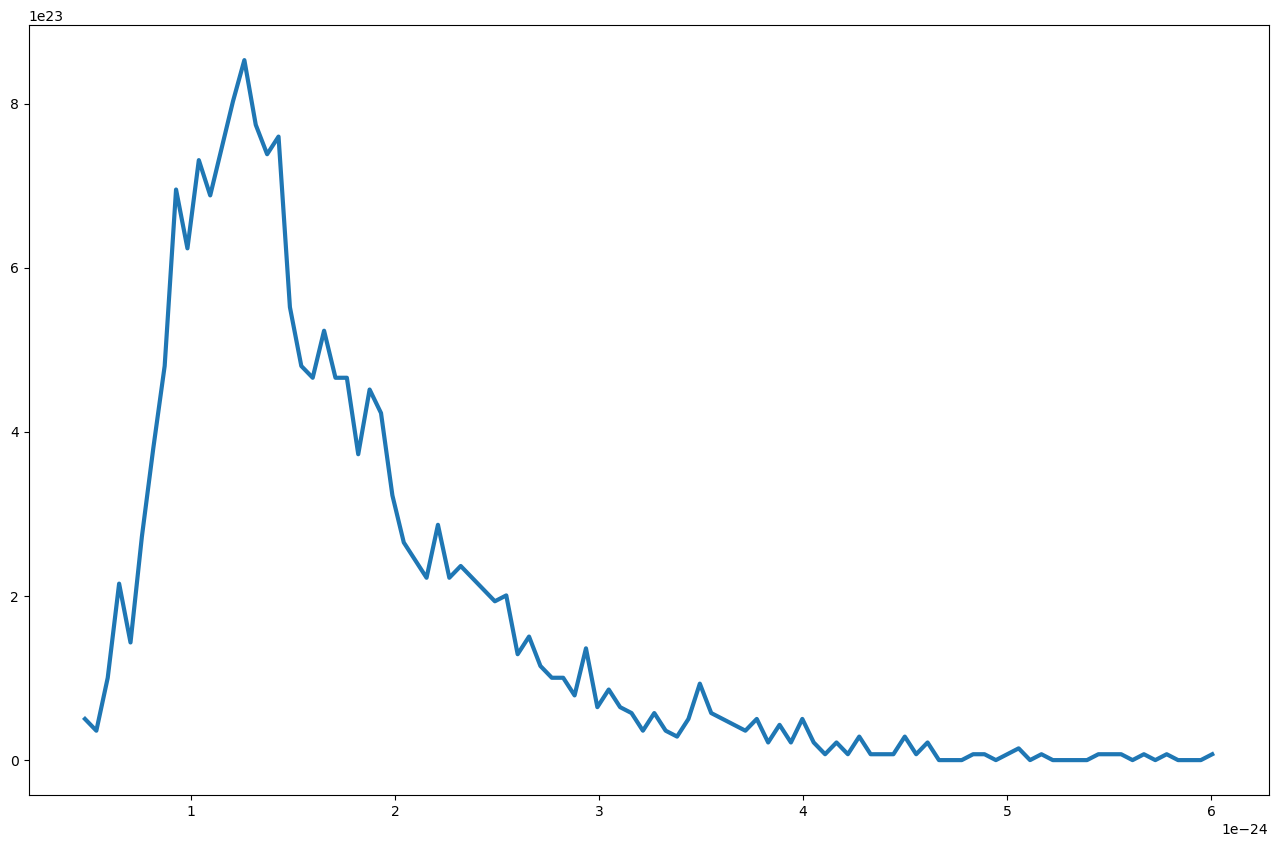

In [39]:
plt.figure(figsize = (16,10))
plt.plot(x0, n, lw = 3.0)
#plt.xlim(0,7e-24)
#plt.ylim(0,1.e24)
plt.show()

## Fitting a log-normal distribution:

$\rho_x=\frac 1 {x\sigma\sqrt{2\pi}}\ \exp\left( - \frac{\left(\ln \left( x \right) -\mu\right)^2}{2\sigma^2}\right)$

In [40]:
#define a function to fit to the data
def func(x, a, s):
    #return ((np.exp(-(np.log(x) - a)**2 / (2*s**2)))/(x * s * np.sqrt(2*np.pi)))
    return ((np.exp(-(np.log(x) - a)**2 / (2*s**2)))/(x * s * np.sqrt(2*np.pi)))

In [41]:
n1 = n/1.e24

x1 = x0/1.e-24

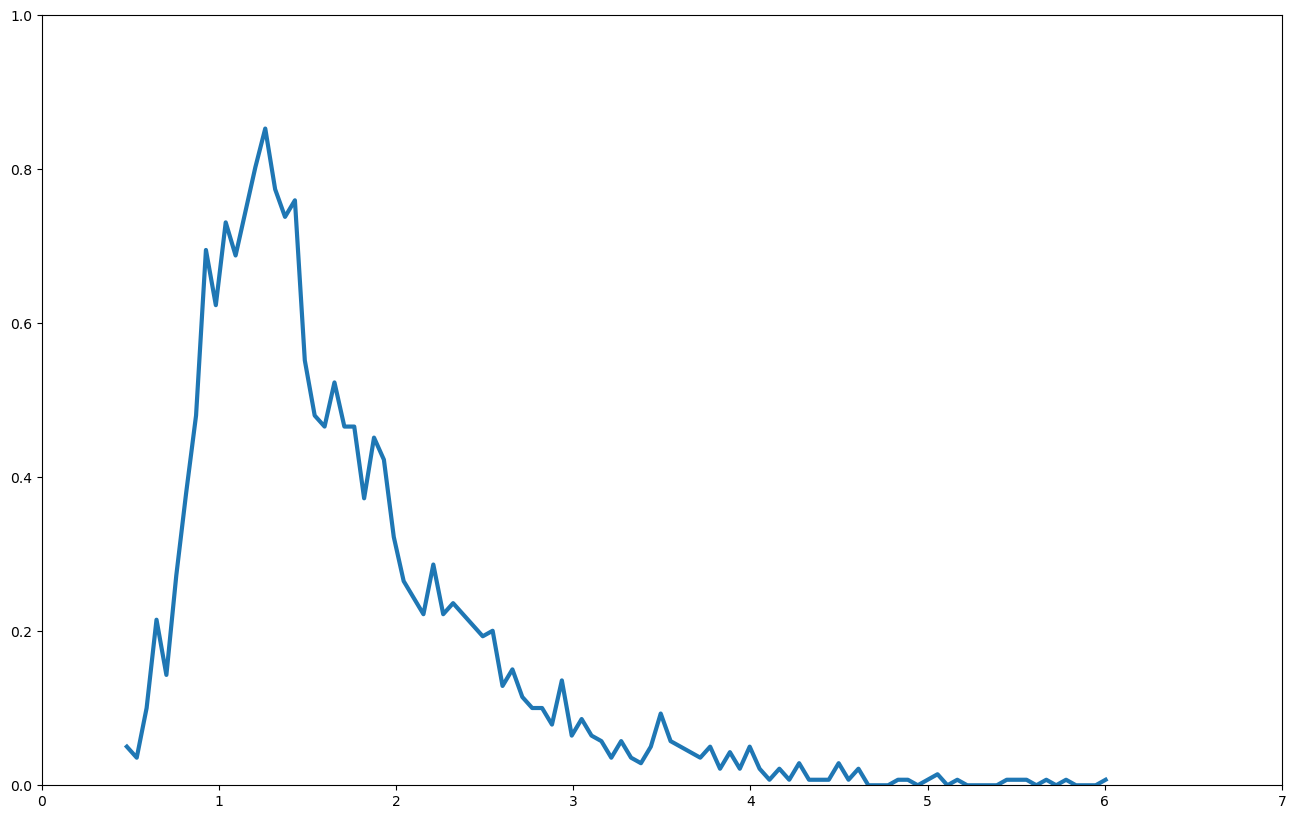

In [42]:
plt.figure(figsize = (16,10))
plt.plot(x1, n1, lw = 3.0)
plt.xlim(0,7)
plt.ylim(0,1)
plt.show()

## Fitting

In [43]:
coef, cova = curve_fit(func, x1, n1)

In [44]:
print(coef)

[0.36810029 0.40304115]


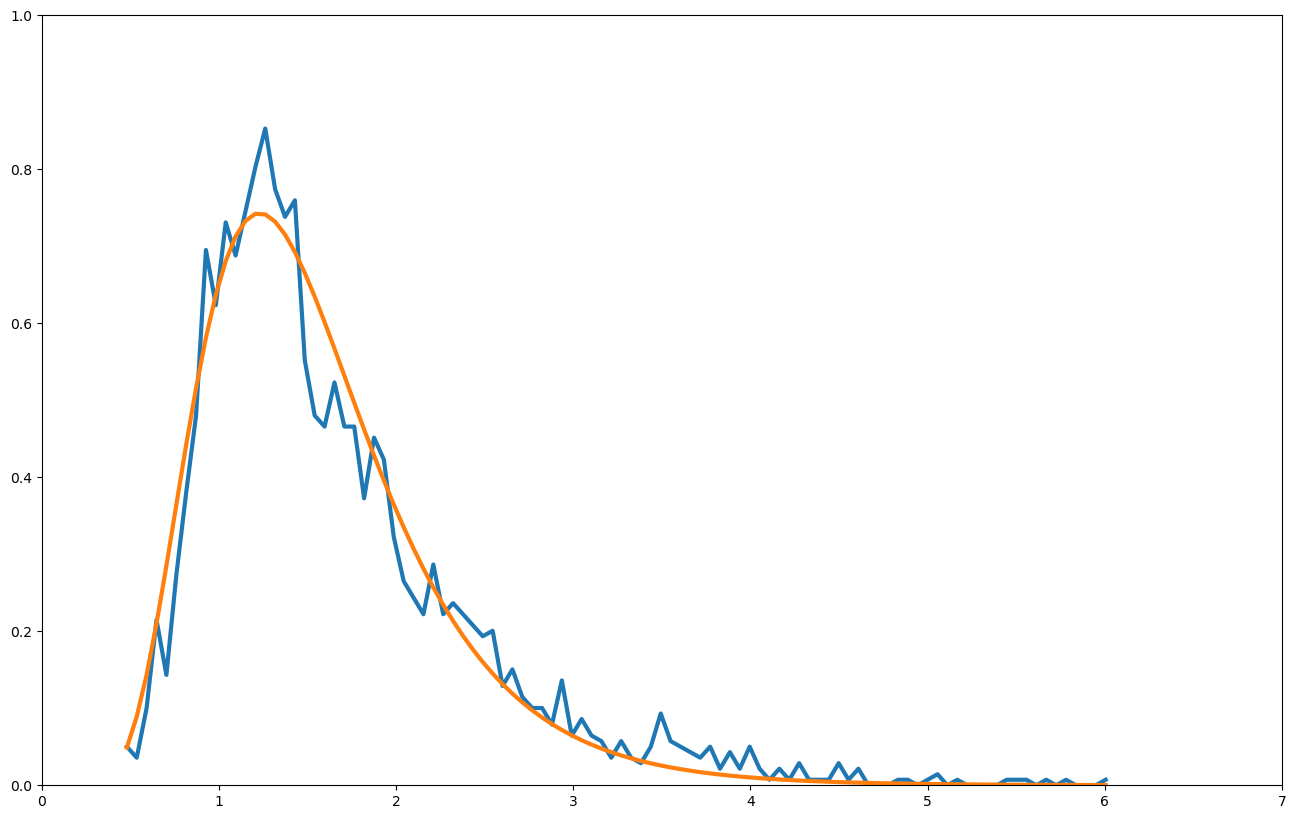

In [45]:
plt.figure(figsize = (16,10))
plt.plot(x1, n1, lw = 3.0)
#Fitting function
plt.plot(x1, func(x1, coef[0], coef[1]), lw = 3.0)

plt.xlim(0,7)
plt.ylim(0,1)
plt.show()

## 2D histograms

In [46]:
prs_cgs = prs_cgs2D.reshape(2500,)

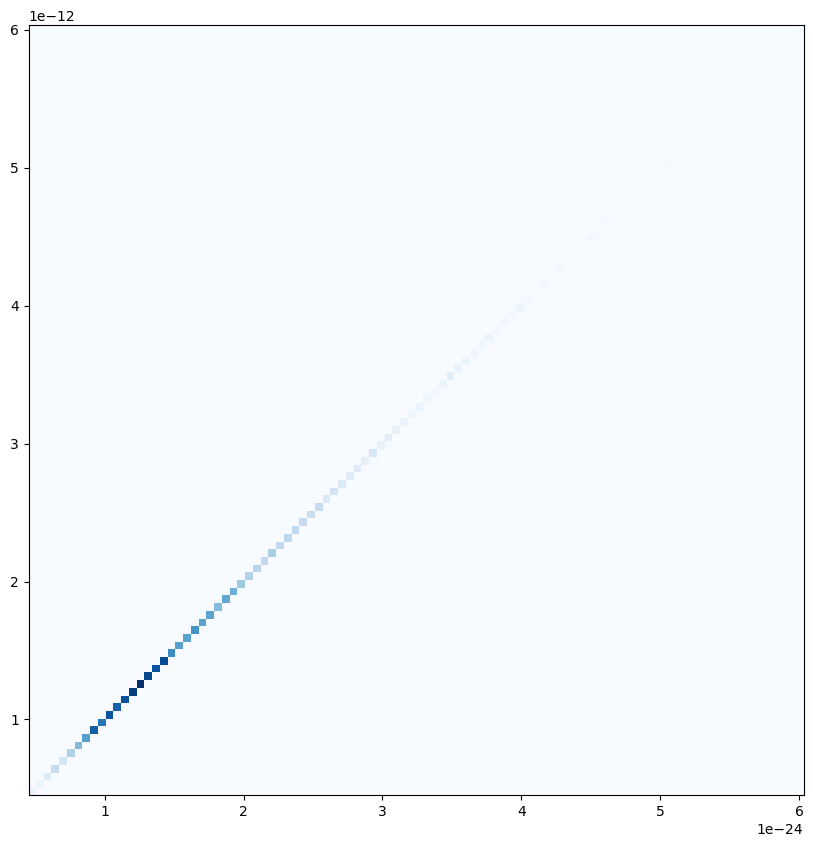

In [47]:
plt.figure(figsize = (10,10))
plt.hist2d(rho_cgs, prs_cgs, bins=100, cmap = "Blues")
plt.show()

In [48]:
H, xedges, yedges, image = plt.hist2d(np.log10(rho_cgs), np.log10(prs_cgs), bins=100)

bin_centers_x = (xedges[:-1] + xedges[1:])/2.0
bin_centers_y = (yedges[:-1] + yedges[1:])/2.0

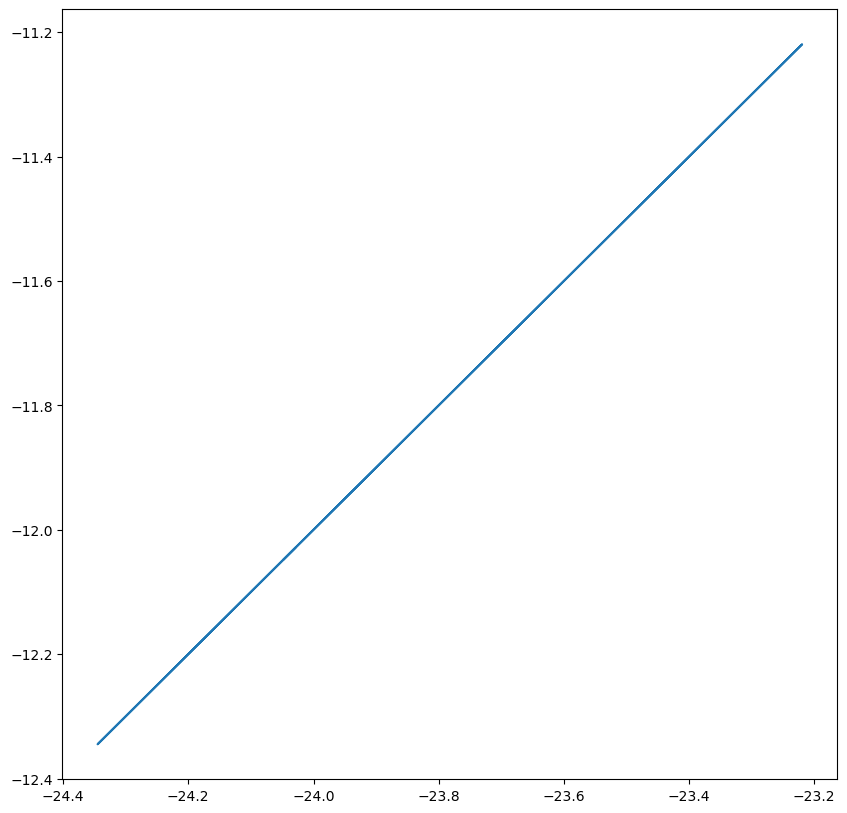

In [58]:
plt.figure(figsize = (10,10))
plt.plot(np.log10(rho_cgs), np.log10(prs_cgs))
plt.show()

## Diagnostics:

In [50]:
average_dens = np.mean(rho_cgs2D)

In [51]:
print(average_dens)

1.660000001464367e-24


In [52]:
std_dens = np.std(rho_cgs2D)

In [53]:
print(std_dens)

7.728668673008188e-25


## Data frame:


In [54]:
t0 = time_cgs[0]

In [55]:
df = pd.DataFrame({'time': t0, 'Av. Dens.': average_dens, 'Std. Dens.': std_dens} , index=[0])

In [56]:
print(df)

   time     Av. Dens.    Std. Dens.
0   0.0  1.660000e-24  7.728669e-25


In [57]:
df.to_csv("datos.csv", sep=',', float_format='{:.2e}'.format)